# Data Preprocessing

In [1]:
# Set up 
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Sources 
source = "./datasets/Data_Extract_From_World_Development_Indicators/time_series.csv"

In [3]:
# Load the data 
gdp_series = pd.read_csv(source)

## Dataset Cleaning

In [4]:
# Info 
gdp_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   794 non-null    object
 1   Country Code   792 non-null    object
 2   Series Name    792 non-null    object
 3   Series Code    792 non-null    object
 4   1960 [YR1960]  792 non-null    object
 5   1961 [YR1961]  792 non-null    object
 6   1962 [YR1962]  792 non-null    object
 7   1963 [YR1963]  792 non-null    object
 8   1964 [YR1964]  792 non-null    object
 9   1965 [YR1965]  792 non-null    object
 10  1966 [YR1966]  792 non-null    object
 11  1967 [YR1967]  792 non-null    object
 12  1968 [YR1968]  792 non-null    object
 13  1969 [YR1969]  792 non-null    object
 14  1970 [YR1970]  792 non-null    object
 15  1971 [YR1971]  792 non-null    object
 16  1972 [YR1972]  792 non-null    object
 17  1973 [YR1973]  792 non-null    object
 18  1974 [YR1974]  792 non-null   

In [5]:
# Column Names 
country_name = "Country Name"
country_code = "Country Code"
series_name = "Series Name"
series_code = "Series Code"

In [6]:
# Unique Series Names and Codes
unique_series_names = gdp_series[series_name].unique()
unique_series_codes = gdp_series[series_code].unique()
for name, code in zip(unique_series_names, unique_series_codes):
    print(name, ":", code)

GDP (constant 2010 US$) : NY.GDP.MKTP.KD
GDP growth (annual %) : NY.GDP.MKTP.KD.ZG
GDP per capita (constant LCU) : NY.GDP.PCAP.KN
nan : nan


In [7]:
# Consider just GDP (constant 2010 USD)
gdp_series_code = "NY.GDP.MKTP.KD"
gdp_mask = gdp_series[series_code] == gdp_series_code
gdp_series[gdp_mask]

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,..,..,..,..,..,..,...,15924179997.7914,17954877146.6564,18960483969.8941,19477070577.8584,19759744157.4377,20206376461.4103,20741239893.4132,20987900552.5239,21808863988.0303,..
3,Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,..,..,..,..,..,..,...,12230507222.1843,12403877841.0321,12528163103.1195,12750473701.7819,13033375121.5884,13465406059.6498,13977387390.5945,14546448944.4056,14872299622.2198,..
6,Algeria,DZA,GDP (constant 2010 US$),NY.GDP.MKTP.KD,27434020371.1579,23701500826.2163,19035850475.3717,25567760578.9799,27060767715.7457,28740402022.6987,...,165828819285.043,171466999140.734,176268075116.674,182966261971.108,189736013664.039,195807566101.288,198353064460.605,200733301234.133,202339167644.005,..
9,American Samoa,ASM,GDP (constant 2010 US$),NY.GDP.MKTP.KD,..,..,..,..,..,..,...,577691629.955947,552317180.61674,537092511.013216,542167400.881057,549779735.682819,534555066.079295,503259911.894273,514255506.60793,..,..
12,Andorra,AND,GDP (constant 2010 US$),NY.GDP.MKTP.KD,..,..,..,..,..,..,...,3449688452.87021,3278085642.31738,3161792390.29564,3240978390.56079,3287458570.8604,3409412700.51704,3421211719.47501,3475566750.62972,3539838260.639,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Sub-Saharan Africa,SSF,GDP (constant 2010 US$),NY.GDP.MKTP.KD,254643578101.007,258298577501.935,273386338345.503,290731576937.126,306421768189.333,321644086565.101,...,1438242300135.81,1497578626069.16,1571809461335.18,1644995903557.61,1690742875974.99,1710375776518.79,1751098510081.93,1792888707498.82,1833900426453.77,..
780,Sub-Saharan Africa (excluding high income),SSA,GDP (constant 2010 US$),NY.GDP.MKTP.KD,253489825139.591,257136889657.043,272153477864.881,289415188334.855,305033531091.833,320196731810.278,...,1426786570008.68,1485745999287.04,1559551433148.76,1632270572241.7,1677548881663.33,1696663910700.65,1736855008442.17,1778108447887.27,1818641581473.11,..
783,Sub-Saharan Africa (IDA & IBRD countries),TSS,GDP (constant 2010 US$),NY.GDP.MKTP.KD,254643578101.007,258298577501.936,273386338345.503,290731576937.126,306421768189.333,321644086565.101,...,1438242300135.81,1497578626069.16,1571809461335.18,1644995903557.61,1690742875974.99,1710375776518.8,1751098510081.93,1792888707498.82,1833900426453.77,..
786,Upper middle income,UMC,GDP (constant 2010 US$),NY.GDP.MKTP.KD,1626241099792.96,1667519494696.86,1738817263566.65,1807336544324.8,1955718094065,2088950796127.62,...,17247301161286.1,18146503877675.2,19061978538952.4,19851283531128,20557464019006.6,21373667112400.1,22402842776829.2,23354597317960.3,24176721916744.9,..


In [8]:
# Renaming the year names 
year_columns_names = list(gdp_series.columns)[4:]
years_columns_new_names = np.arange(1960, 2021)
years_rename_dict = {name:new_name for name, new_name in zip(year_columns_names, years_columns_new_names)}
gdp_series = gdp_series.rename(columns = years_rename_dict)

In [9]:
# Frequently used masks
years = np.arange(1960, 2021)
gdp_mask = gdp_series[series_code] == gdp_series_code
gdp_per_capita_mask = gdp_series[series_code] == "NY.GDP.PCAP.KN"
gdp_growth_mask = gdp_series[series_code] == "NY.GDP.MKTP.KD.ZG"

In [10]:
# Replace the place holder for NaN with Nan in the dataset
nan_placeholder = ".."
nan_mask = (gdp_series == nan_placeholder)
gdp_series[nan_mask] = None

In [11]:
# Null or NaN values 
np.count_nonzero(gdp_series[gdp_mask][years].isna())

4166

In [12]:
# Drop the last two rows (metadata)
gdp_series = gdp_series.iloc[:-2]
# gdp_series

In [13]:
# Number of years in the dataset 
years.shape # 61 years

(61,)

<ipython-input-14-bb23903c0fe4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nan_per_row = np.count_nonzero(gdp_series[gdp_mask][years].isna(), axis = 1)
C:\Users\aadityachaitanya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

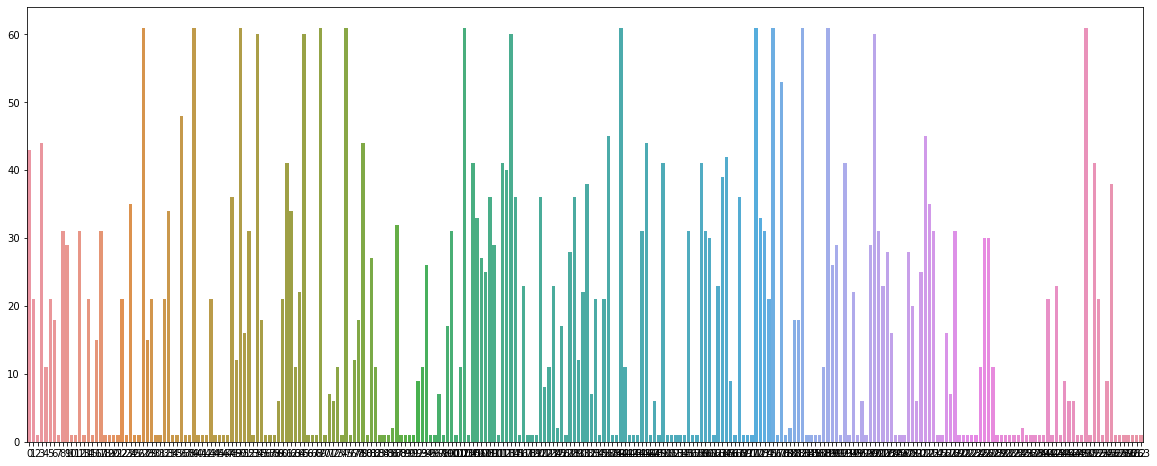

In [14]:
# Where are the Null Values
figure, ax  = plt.subplots(figsize=(20, 8))
nan_per_row = np.count_nonzero(gdp_series[gdp_mask][years].isna(), axis = 1)
sns.barplot(np.arange(nan_per_row.shape[0]), nan_per_row, ax=ax)

In [15]:
# Seems like there are many data sets with empty data (50 to 60 ramge)
empty_data_sets = np.where(nan_per_row >= 50)[0]
gdp_series[gdp_mask][country_name].iloc[empty_data_sets]
# Maybe removing the regions would help change these 

<ipython-input-15-523e8d6ca5c2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gdp_series[gdp_mask][country_name].iloc[empty_data_sets]


81        British Virgin Islands
117              Channel Islands
150                      Curacao
162                     Djibouti
195                Faroe Islands
207             French Polynesia
225                    Gibraltar
309    Korea, Dem. People's Rep.
342                Liechtenstein
420                New Caledonia
516    Sint Maarten (Dutch part)
528                      Somalia
534                  South Sudan
549     St. Martin (French part)
567         Syrian Arab Republic
600     Turks and Caicos Islands
750               Not classified
Name: Country Name, dtype: object

In [16]:
# Check if this is right 
gdp_series[gdp_series[country_name] == "Turks and Caicos Islands"]

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
600,Turks and Caicos Islands,TCA,GDP (constant 2010 US$),NY.GDP.MKTP.KD,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
601,Turks and Caicos Islands,TCA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,None,None,None,None,None,None,...,None,-0.97229935533214,1.07088049554034,8.71129580824214,11.3148293929929,7.25118627570257,-2.490222604148,5.61095461704357,5.32455729668722,None
602,Turks and Caicos Islands,TCA,GDP per capita (constant LCU),NY.GDP.PCAP.KN,None,None,None,None,None,None,...,22000.1977409593,21345.6525568015,21161.1535895936,22589.598853308,24717.8729451029,26091.083902175,25060.2344341392,26079.880120398,27090.1977174753,None


In [17]:
# drop the 2020 column 
gdp_series = gdp_series.drop(columns=2020)

In [18]:
# Remove 2020 from years
_2020 = years == 2020
years = years[~_2020]

In [19]:
# Cleaning Steps 
# 1) Remove regions 
# 2) Remove countries with more than 50 empty rows 
# 3) Check if the values are consecuetive (if not remove)

### Cleaning Steps

In [20]:
# Get only gdp data 
gdp_series_gdp_only = gdp_series[gdp_mask]

<ipython-input-20-35e500c72b6f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gdp_series_gdp_only = gdp_series[gdp_mask]


In [21]:
# Countries only series
countries_only = gdp_series[country_name].unique()[:-48]
countries_only_mask = gdp_series[country_name].isin(countries_only)
gdp_series_gdp_only = gdp_series_gdp_only[countries_only_mask] 

<ipython-input-21-7687b5b39e3a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gdp_series_gdp_only = gdp_series_gdp_only[countries_only_mask]


In [22]:
# Removing countries with more than 50 empty rows
empty_rows_threshold = 40
gdp_only_nan_per_row = np.count_nonzero(gdp_series_gdp_only[years].isna(), axis = 1)
gdp_only_non_empty_datasets = np.where(gdp_only_nan_per_row < empty_rows_threshold)[0]

In [23]:
gdp_series_gdp_only_clean = gdp_series_gdp_only.iloc[gdp_only_non_empty_datasets]
gdp_series_gdp_only_clean = (gdp_series_gdp_only_clean.reset_index()).drop(columns="index")

In [24]:
def extract_split_sequences(seq, sequence_length_threshold=1):
    """Given a sequence, this function returns a 
    list of slices with length greater than 
    the threshold
    """
    subtract_seq = np.append(seq[1:], seq[-1])
    diff = subtract_seq - seq
    non_one_ind = np.where(diff != 1)[0] + 1
    
    split_slices = []
    non_one_ind = np.insert(non_one_ind, [0], 0)
    for(non_one_index, val) in enumerate(non_one_ind):
        if(non_one_index+1 < len(non_one_ind)):
            next_index = non_one_ind[non_one_index + 1]
            _slice = slice(val,next_index)

        else:
            _slice = slice(val, len(non_one_ind))

        required_slice = seq[_slice]
        if (len(required_slice) > sequence_length_threshold):    
            split_slices.append(required_slice)
    
    return split_slices

In [25]:
# Only take those time series with more than 10 continuous data points 
gdp_series_gdp_only_clean_truncated = gdp_series_gdp_only_clean[years].copy()
gdp_series_gdp_only_clean_truncated = []
consecuetive_datapoints_threshold = 20 # minimum threshold of 20 years
for index in gdp_series_gdp_only_clean.index:
    #print("Index:", index)
    
    index_array = gdp_series_gdp_only_clean[years].iloc[index]
    nonzero_bool = (index_array).isna().to_numpy() # This is a bool array of whether there is a value in an array 
    nonzero_indices = np.argwhere(nonzero_bool==0).flatten() # Indices of values where the value is not Nan
    
    # Checking if the indices are consecuetive
    consecuetive_sequences_indices = extract_split_sequences(nonzero_indices,consecuetive_datapoints_threshold)
    consecuetive_sequences = []
    for sequence_indices in consecuetive_sequences_indices:
        consecuetive_sequences_individual = index_array.iloc[sequence_indices].to_numpy()
        gdp_series_gdp_only_clean_truncated.append(consecuetive_sequences_individual)
        #consecuetive_sequences.append(consecuetive_sequences_individual) # Can append to consecuetive sequences
                                                                          # or directly to the dataset
        
    #gdp_series_gdp_only_clean_truncated.append(consecuetive_sequences)


In [26]:
# This is the GDP only series with continuous sequential data
gdp_only_time_series = np.array(gdp_series_gdp_only_clean_truncated)

<ipython-input-26-f61b100210bc>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  gdp_only_time_series = np.array(gdp_series_gdp_only_clean_truncated)


In [27]:
# Lengths of each timeseries
for item in gdp_only_time_series:
        print(item.shape)


(40,)
(60,)
(50,)
(40,)
(43,)
(60,)
(30,)
(32,)
(60,)
(60,)
(30,)
(60,)
(40,)
(60,)
(46,)
(30,)
(60,)
(60,)
(60,)
(60,)
(40,)
(60,)
(26,)
(60,)
(60,)
(46,)
(40,)
(60,)
(60,)
(40,)
(27,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(40,)
(60,)
(60,)
(60,)
(60,)
(25,)
(49,)
(45,)
(30,)
(60,)
(43,)
(60,)
(60,)
(60,)
(55,)
(40,)
(27,)
(50,)
(39,)
(60,)
(60,)
(60,)
(60,)
(54,)
(55,)
(50,)
(60,)
(60,)
(49,)
(43,)
(60,)
(34,)
(50,)
(60,)
(60,)
(60,)
(59,)
(29,)
(60,)
(60,)
(60,)
(60,)
(52,)
(50,)
(35,)
(60,)
(60,)
(54,)
(60,)
(44,)
(30,)
(60,)
(50,)
(60,)
(28,)
(34,)
(36,)
(25,)
(32,)
(60,)
(21,)
(25,)
(60,)
(38,)
(60,)
(60,)
(60,)
(25,)
(53,)
(50,)
(38,)
(59,)
(44,)
(60,)
(33,)
(25,)
(49,)
(39,)
(23,)
(54,)
(40,)
(60,)
(40,)
(60,)
(60,)
(50,)
(60,)
(60,)
(60,)
(30,)
(60,)
(55,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(30,)
(60,)
(60,)
(30,)
(31,)
(60,)
(38,)
(22,)
(52,)
(60,)
(25,)
(60,)
(60,)
(60,)
(28,)
(30,)
(40,)
(60,)
(60,)
(59,)
(43,)
(43,)
(60,)
(60,)
(60,)
(60,)
(50,)
(35,)
(32,)
(60,)
(60,

### Train, Val and Test sets

In [28]:
# Split over countries 
# The test may be biased

In [29]:
# Divide into sets
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()

In [30]:
# Full dataset 
gdp_only_time_series_flattened = gdp_only_time_series.flatten()
gdp_only_flat = [individual_value for gdp_only_time_series_individual in gdp_only_time_series_flattened 
 for individual_value in gdp_only_time_series_individual]
gdp_only_flat = np.array(gdp_only_flat).astype(np.float)

In [31]:
# Standardization 
gdp_only_time_series_flattened = [array.astype(np.float64) for array in gdp_only_time_series_flattened]
means = [array.mean() for array in gdp_only_time_series_flattened]
stds = [array.std() for array in gdp_only_time_series_flattened]
gdp_only_time_series_standardized = []
for (index, gdp_series) in enumerate(gdp_only_time_series_flattened):
    gdp_series_standardized = (gdp_series - means[index])/stds[index]
    gdp_only_time_series_standardized.append(gdp_series_standardized)

In [32]:
gdp_only_time_series_standardized = [list(individual_list_array) for individual_list_array in gdp_only_time_series_standardized]
# gdp_only_time_series_standardized

In [33]:
# splits 
n_countries = len(gdp_only_time_series_standardized)
train_size = 70  * n_countries // 100
val_size = 15  * n_countries // 100
test_size = 155 * n_countries // 100

In [34]:
# Test val and train 
train_set = gdp_only_time_series_standardized[:train_size]
val_set = gdp_only_time_series_standardized[train_size:train_size+val_size]
test_set = gdp_only_time_series_standardized[train_size+val_size:train_size+val_size+test_size]

In [35]:
# Download as json 
import json 
spread_over_country_standardized_path = "./datasets/spread_over_country/spread_over_country_standardized.json"
with open(spread_over_country_standardized_path, "w") as fp:
    spread_over_country_dict = {"mean":means, "std":stds, "train":train_set, "val":val_set, "test":test_set}
    json.dump(spread_over_country_dict, fp)

## Split over years
This will lead to a less biased estimation 

In [36]:
# Split over years 
gdp_series_gdp_only[years]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,None,None,None,None,None,None,None,None,None,None,...,15856574731.441,15924179997.7914,17954877146.6564,18960483969.8941,19477070577.8584,19759744157.4377,20206376461.4103,20741239893.4132,20987900552.5239,21808863988.0303
3,None,None,None,None,None,None,None,None,None,None,...,11926928505.5231,12230507222.1843,12403877841.0321,12528163103.1195,12750473701.7819,13033375121.5884,13465406059.6498,13977387390.5945,14546448944.4056,14872299622.2198
6,27434020371.1579,23701500826.2163,19035850475.3717,25567760578.9799,27060767715.7457,28740402022.6987,27359434056.5179,29945711115.2865,33178721529.606,35976776110.2383,...,161155315145.814,165828819285.043,171466999140.734,176268075116.674,182966261971.108,189736013664.039,195807566101.288,198353064460.605,200733301234.133,202339167644.005
9,None,None,None,None,None,None,None,None,None,None,...,576000000,577691629.955947,552317180.61674,537092511.013216,542167400.881057,549779735.682819,534555066.079295,503259911.894273,514255506.60793,None
12,None,None,None,None,None,None,None,None,None,None,...,3449966856.68832,3449688452.87021,3278085642.31738,3161792390.29564,3240978390.56079,3287458570.8604,3409412700.51704,3421211719.47501,3475566750.62972,3539838260.639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,None,None,None,None,None,None,None,None,None,None,...,4339000000,3985004715.8689,3386486677.67037,3189026880.45273,3161402970.99741,3167541617.54304,3196188634.75596,3141963923.60293,None,None
639,None,None,None,None,None,None,None,None,None,None,...,9681500000,10611002273.8757,11257897418.4292,11786857594.023,11768250076.6982,12206181928.1022,13288213428.4992,13476822019.5986,13642193053.8512,13771659441.9981
642,None,None,None,None,None,None,None,None,None,None,...,30906749533.221,26977011029.6103,27622540063.9838,28954889799.6317,28900283353.3845,20809811298.515,18858879105.7419,17902354868.0681,18037087754.3093,18415400223.2268
645,4592975693.64825,4655503637.61439,4539542515.26964,4688094181.90157,5260700256.40491,6136473014.94653,5794652456.69258,6253571345.18772,6331636551.24971,6303972629.29687,...,20265559483.8548,21393257280.4403,23018629943.0906,24182735402.6391,25318838464.9059,26058243522.128,27042379771.1117,27990035646.5365,29119259552.6464,29539096537.4914


In [37]:
# Get a series time wise 
spread_over_time = gdp_series_gdp_only[years].dropna()

In [38]:
# Splits 
n_years = spread_over_time.shape[1]
train_size = 70  * n_years // 100
val_size = 20  * n_years // 100
test_size = 10 * n_years // 100

In [104]:
# Train test and val split
spread_over_time_numpy = spread_over_time.to_numpy().astype(np.float64)
train_set = spread_over_time_numpy[:, :train_size]
val_set = spread_over_time_numpy[:, train_size:train_size+val_size]
test_set = spread_over_time_numpy[:, train_size+val_size:train_size+val_size+test_size]

In [106]:
train_set.shape

(90, 42)

In [107]:
# Train Set standardizing THE RIGHT WAY
std = train_set.std()
mean = train_set.mean()
spread_over_time_dict = {"mean":mean, "std":std}

In [108]:
train_set = (train_set-mean)/std
val_set = (val_set-mean)/std
test_set = (test_set-mean)/std

In [120]:
train_set.shape, val_set.shape

((90, 42), (90, 12))

In [40]:
# Numpy and Standardize 
#spread_over_time_numpy = spread_over_time.to_numpy()
#ss = StandardScaler()
#train_set = ss.fit_transform(train_set)
#val_set = ss.transform(val_set)
#test_set = ss.transform(test_set)

In [41]:
# SS Values 
#spread_over_time_mean = list(ss.mean_)
#spread_over_time_var = list(ss.var_)
#spread_over_time_dict = {"mean":spread_over_time_mean, "std":spread_over_time_var}

In [121]:
# Download 
spread_over_time_path = "./datasets/spread_over_time/spread_over_time_standardized.json"
spread_over_time_dict["train"] = train_set.tolist()
spread_over_time_dict["test"] = test_set.tolist()
spread_over_time_dict["val"] = val_set.tolist()
with open(spread_over_time_path, "w") as fp:
    json.dump(spread_over_time_dict, fp)

In [51]:
# Standardize
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
train_set_minmax = MinMax.fit_transform(train_set)
val_set_minmax = MinMax.transform(val_set)
test_set_minmax = MinMax.transform(test_set)

In [57]:
train_set_minmax.shape

(42, 90)

In [66]:
# Download 
spread_over_time_path_minmax = "./datasets/spread_over_time/spread_over_time_minmax.json"
spread_over_time_minmax_dict = {"min":MinMax.data_min_.tolist(), "max":MinMax.data_max_.tolist() }

spread_over_time_minmax_dict["train"] = [list(array) for array in train_set_minmax]
spread_over_time_minmax_dict["test"] = [list(array) for array in test_set_minmax]
spread_over_time_minmax_dict["val"] = [list(array) for array in val_set_minmax]

with open(spread_over_time_path_minmax, "w") as fp:
    json.dump(spread_over_time_minmax_dict, fp)

## Exploration Model

In [45]:
spread_over_time

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,27434020371.1579,23701500826.2163,19035850475.3717,25567760578.9799,27060767715.7457,28740402022.6987,27359434056.5179,29945711115.2865,33178721529.606,35976776110.2383,...,161155315145.814,165828819285.043,171466999140.734,176268075116.674,182966261971.108,189736013664.039,195807566101.288,198353064460.605,200733301234.133,202339167644.005
21,115573868508.15,121847036500.547,120808873523.837,114396100733.294,125984766250.65,139300642138.499,138381639345.114,142798776600.374,149685248718.023,164174071297.927,...,423627422092.49,449061807872.401,444452545623.356,455143068397.581,443707073929.401,455825423287.839,446342760088.163,458922944048.575,447149955692.001,437813398153.622
30,199140913998.197,204091098084.214,206736296993.324,219584193744.787,234907925364.002,248963655147.257,254895110718.513,270960181431.042,284767807750.202,304827789929.508,...,1146138465603.81,1174365063005.45,1220378598873.43,1251924137225.91,1283636811145.51,1311782440650.19,1348127369665.9,1379142531152.01,1419817385593.49,1450499018770.09
33,91836704603.8273,96922602310.0595,99489767156.2721,103606919937.48,109952174211.113,113778702199.799,120199076680.091,123814722359.088,129352104013.722,137470070238.14,...,391892746544.69,403346977095.66,406091533760.531,406195106237.474,408881164188.391,413029270083.549,421246227873.787,431354400137.306,442483864448.169,448761534683.333
39,1942547494.47697,2149760928.32098,2374453336.26629,2624342116.16787,2899939167.10327,3202275123.06532,3492783239.37552,3828024551.81008,4150411728.72773,4523187705.80538,...,10095760000,10157685792.5136,10471221745.1457,10190699858.554,10298142085.3126,10321877049.9511,10470928720.8909,10797162391.2307,11123884435.3286,11259359315.7961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,730143163309.042,749689964248.321,757958367203.24,794904168563.027,838891457696.607,856861993729.192,870341293300.402,894593132734.245,943268691513.902,961418094550.027,...,2475244321361.11,2513366732498.41,2550537514410.06,2605105900265.92,2673033408802.78,2735997360453.5,2788478034235.71,2841238185971.41,2879331251695.23,2921446026408.24
618,3173064455312.67,3246044937784.85,3444053678989.73,3595592040865.28,3804136379235.47,4047601107506.54,4310695179494.47,4418462558981.83,4630548761812.94,4774095773429.15,...,14992052727000,15224554803505.2,15567038144417.2,15853795607253.8,16254258275174.8,16726935659206.4,17000895844117,17403783207186.7,17913248631409.5,18300385513295.6
621,13898153415.4327,14244639650.0362,14020350840.1918,14044249769.6626,14387002603.6564,14537433686.0417,14982694336.5264,14434802059.0992,14707462730.4237,15570017273.3107,...,40284481653.4343,42364020183.538,43862934931.6252,45897095483.2607,47383606585.9178,47559277164.2749,48362932955.4673,49616180349.7098,50420003964.8555,50531997748.8587
645,4592975693.64825,4655503637.61439,4539542515.26964,4688094181.90157,5260700256.40491,6136473014.94653,5794652456.69258,6253571345.18772,6331636551.24971,6303972629.29687,...,20265559483.8548,21393257280.4403,23018629943.0906,24182735402.6391,25318838464.9059,26058243522.128,27042379771.1117,27990035646.5365,29119259552.6464,29539096537.4914
